**Step 1: Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Clustering
from sklearn.metrics import silhouette_score

# Visualization
import plotly as py
import plotly.graph_objs as go


**Step 2: Read Datasets**

In [ ]:
df= pd.read_csv('https://github.com/V-Vibee/My-Projects/raw/main/5.%20Cutomer%20sermentation%20Analysis/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

**Step3: Statistical Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Step 4: Exploratory data Analysis**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

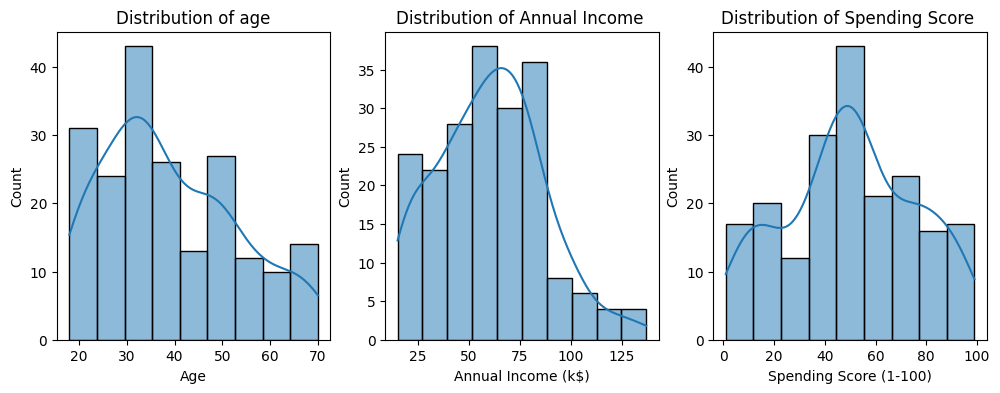

In [ ]:
# Distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde= True)
plt.title('Distribution of age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde= True )
plt.title('Distribution of Annual Income ')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde= True)
plt.title('Distribution of Spending Score ')


plt.show()




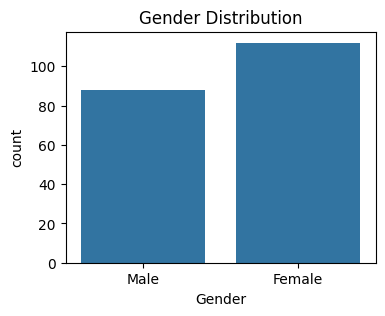

In [ ]:
# Gender distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [ ]:
df['Gender'].value_counts(normalize= True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

**Bi-Variate Analysis**

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

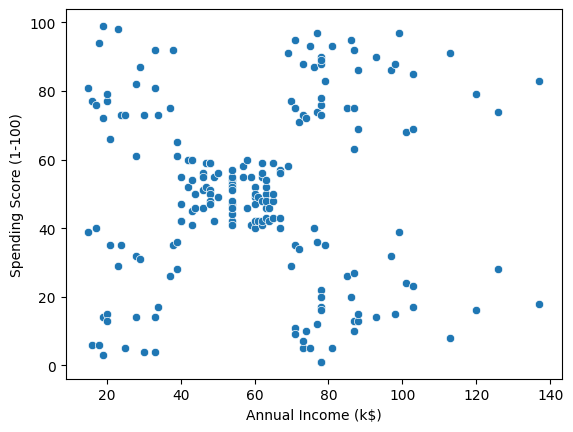

In [ ]:
sns.scatterplot(data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)');

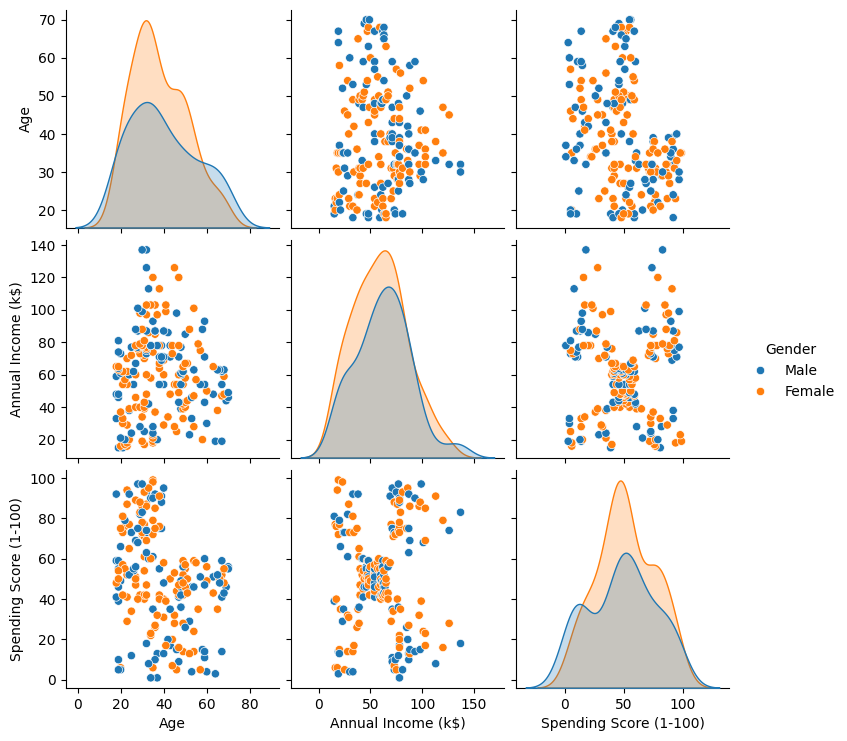

In [ ]:
df= df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')

**K-means Clustering**

K-means is one of the most known algorithms to find clusters, works with large datasets while being fast and efficient. This technique was developed in 1957!

* Centroid-based clustering algorithm.
* Maximize intra-cluster similarity.
* Minimize inter-Cluster similarity.


To start we need to set the number of clusters for the K-Means algorithm - How many clusters do we want? - Usually represented by K.

1. Then, the algorithm will randomly select K centers, one for each cluster of
data (which are called centroids).
2. Assign each instance to the closest centroid.
3. Calculate the centroids of each cluster formed
4. Return to step 2
5. End when the centroids no longer change

Randomly selected centroids impact the results ? Yes, but with scikit-learn

In [ ]:
# Extract features for clustering
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)', ]]


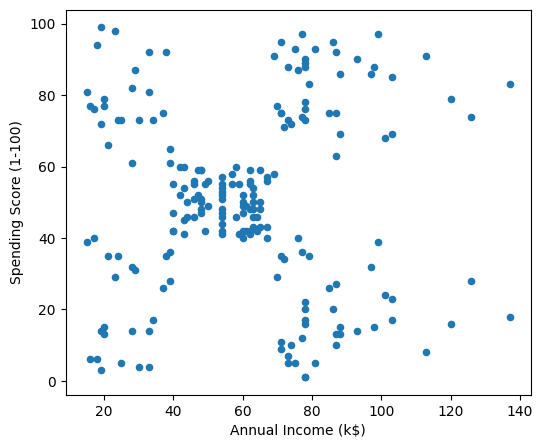

In [ ]:
df1.plot(kind="scatter",
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        figsize=(6, 5))
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k=[]
for i in range(1,11):
  km= KMeans(n_clusters=i)
  km.fit(df1)
  k.append(km.inertia_)

**WSS Plot**

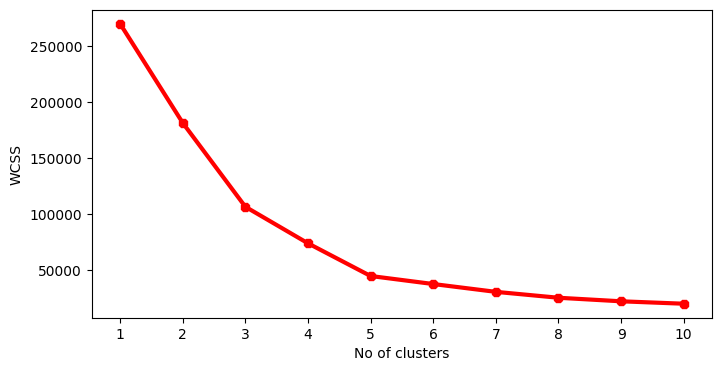

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), k)
plt.plot(range(1,11), k, linewidth=3, color='red', marker='8')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

**Hence K will be 5, which we got from elbow graph**

In [ ]:
model= KMeans(n_clusters=5)
y= model.fit_predict(df1)
df1['Label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [ ]:
df1['Label'].value_counts()

Label
0    81
2    39
1    35
4    23
3    22
Name: count, dtype: int64

In [ ]:
print("Centroids", model.cluster_centers_)

Centroids [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


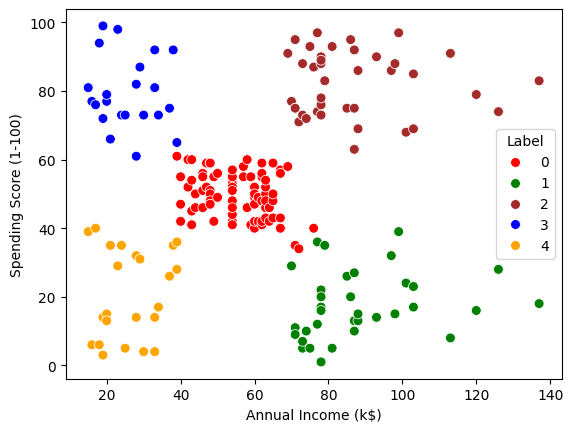

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange']);


In [ ]:
centroids = model.cluster_centers_

In [ ]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = model.fit_predict(df1)

In [ ]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Label,Cluster
0,15,39,4,3
1,15,81,3,0
2,16,6,4,3
3,16,77,3,0
4,17,40,4,3


**Visualizing Clusters/ Centroids**

In [ ]:
Color = ['blue', 'red', 'green', 'brown', 'orange']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

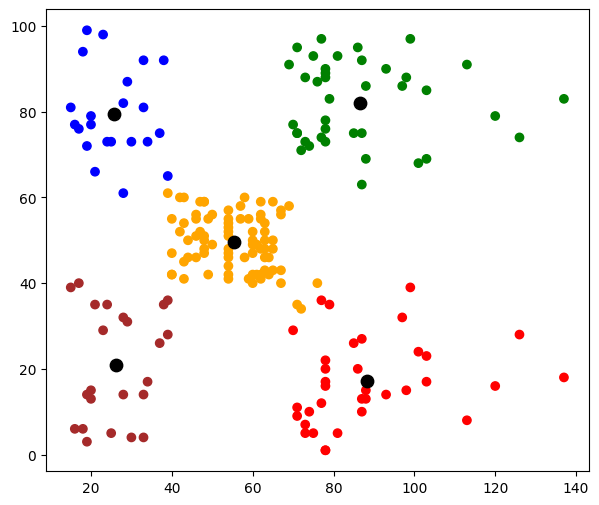

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(df1["Annual Income (k$)"],
           df1["Spending Score (1-100)"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=80)
plt.show()

From the above graph, we can see that there are 5 clusters.

1. Medium Income - Medium Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of 40 - 80 and have a spending score in the range of 40 - 60.
2. High Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 65 and have a spending score of less than 40.
3. Low Income - Low Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of less than 40.
4. Low Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of < 40 and have a spending score of greater than 60.
5. High Income - High Score customers: From the above graph, we can see that the customers belonging to this cluster have an income range of > 70 and have a spending score of greater than 6

The aim of the mall is to increase the customers present in the cluster 'High Income - High Score' by reducing the customers present in the cluster 'High Income - Low Score' and also to migrate the customers present in the cluster 'Medium Income - Medium Score' to higher spending scores.

**Evaluation with Silhouette Score**

In [ ]:
labels = model.labels_

In [ ]:
silhouette_score(df1, labels)

0.5553398072116895

In [ ]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

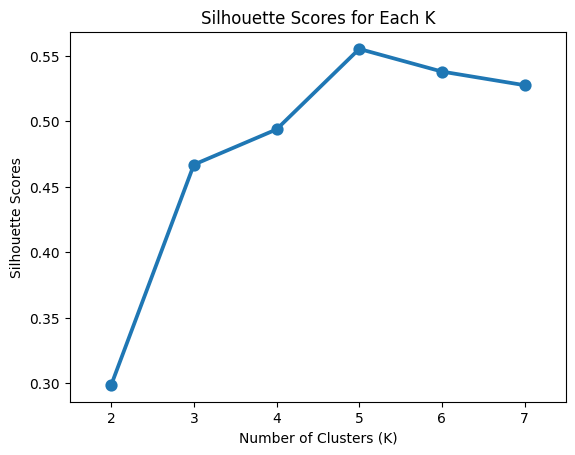

In [ ]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

**Client Segmentation with All 3 Features**

In [ ]:
df2= df.copy()

In [ ]:
df2= df2.drop(columns=['Gender'], axis=1)

In [ ]:
sum_of_sqr_dist = {}

for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[i] = km.inertia_

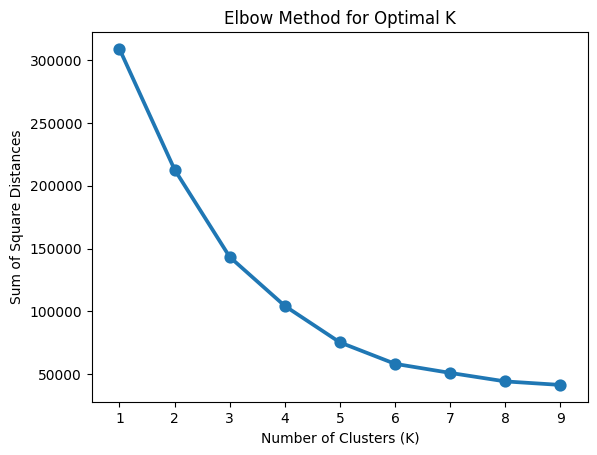

In [ ]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

KMeans(max_iter=1000, n_clusters=6)

In [ ]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


**Conclusion**

Hence, K-Means clustering helps the mall in understanding the various customer groups and ways to improve the customer's spending score that helps the business of the mall.